In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mbl
from scipy import stats
%matplotlib inline
from scipy.stats import beta

In [2]:
# from pybaseball import pitching_stats
# data = pitching_stats(2016, 2018)
# data.head()

KeyboardInterrupt: 

In [9]:
pd.set_option('display.max_columns', 500)
pd.set_option("display.max_rows", 101)

In [10]:
data = pd.read_csv("/Users/orah82/omar_raheem_capstone/pitching_2016-18.csv")

In [11]:
data.head()

,Unnamed: 0,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,H/9,HR/9,AVG,WHIP,BABIP,LOB%,FIP,GB/FB,LD%,GB%,IFFB%,HR/FB,IFH%,BUH%,Starting,Start-IP,Relieving,Relief-IP,RAR,Dollars,tERA,xFIP,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB%,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (pfx),FT% (pfx),FC% (pfx),FS% (pfx),FO% (pfx),SI% (pfx),SL% (pfx),CU% (pfx),KC% (pfx),EP% (pfx),CH% (pfx),SC% (pfx),KN% (pfx),UN% (pfx),vFA (pfx),vFT (pfx),vFC (pfx),vFS (pfx),vFO (pfx),vSI (pfx),vSL (pfx),vCU (pfx),vKC (pfx),vEP (pfx),vCH (pfx),vSC (pfx),vKN (pfx),FA-X (pfx),FT-X (pfx),FC-X (pfx),FS-X (pfx),FO-X (pfx),SI-X (pfx),SL-X (pfx),CU-X (pfx),KC-X (pfx),EP-X (pfx),CH-X (pfx),SC-X (pfx),KN-X (pfx),FA-Z (pfx),FT-Z (pfx),FC-Z (pfx),FS-Z (pfx),FO-Z (pfx),SI-Z (pfx),SL-Z (pfx),CU-Z (pfx),KC-Z (pfx),EP-Z (pfx),CH-Z (pfx),SC-Z (pfx),KN-Z (pfx),wFA (pfx),wFT (pfx),wFC (pfx),wFS (pfx),wFO (pfx),wSI (pfx),wSL (pfx),wCU (pfx),wKC (pfx),wEP (pfx),wCH (pfx),wSC (pfx),wKN (pfx),wFA/C (pfx),wFT/C (pfx),wFC/C (pfx),wFS/C (pfx),wFO/C (pfx),wSI/C (pfx),wSL/C (pfx),wCU/C (pfx),wKC/C (pfx),wEP/C (pfx),wCH/C (pfx),wSC/C (pfx),wKN/C (pfx),O-Swing% (pfx),Z-Swing% (pfx),Swing% (pfx),O-Contact% (pfx),Z-Contact% (pfx),Contact% (pfx),Zone% (pfx),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
0,118,2018.0,Jacob deGrom,Mets,30.0,10.0,9.0,1.70,9.0,32.0,32.0,1.0,0.0,0.0,0.0,217.0,835.0,152.0,48.0,41.0,10.0,46.0,3.0,5.0,2.0,0.0,269.0,235.0,160.0,111.0,26.0,999.0,2213.0,3212.0,86.0,16.0,9.0,2.0,11.16,1.91,5.85,6.30,0.41,0.194,0.91,0.281,0.820,1.99,1.47,0.219,0.464,0.163,0.063,0.068,0.222,75.8,217.0,NaN,NaN,75.8,$72.3,2.15,2.60,5.85,-12.63,18.48,52.57,5.70,1.14,1.06,0.88,1.01,31.0,4.62,0.52,0.521,96.0,0.239,91.1,NaN,NaN,0.079,82.7,0.161,89.0,NaN,NaN,NaN,NaN,0.003,NaN,23.9,15.9,NaN,4.6,12.8,NaN,NaN,1.43,2.08,NaN,1.81,2.48,NaN,NaN,0.379,0.688,0.517,0.577,0.797,0.708,0.446,0.665,0.151,0.0,0.0,0.0,45.0,49.0,64.0,0.322,0.055,2.78,3.57,-0.29,0.435,0.089,NaN,NaN,NaN,NaN,0.240,0.079,NaN,NaN,0.157,NaN,NaN,NaN,96.0,95.3,NaN,NaN,NaN,NaN,91.1,82.7,NaN,NaN,88.9,NaN,NaN,-3.0,-7.4,NaN,NaN,NaN,NaN,1.8,3.4,NaN,NaN,-7.7,NaN,NaN,9.2,6.9,NaN,NaN,NaN,NaN,3.3,-2.3,NaN,NaN,3.1,NaN,NaN,26.1,-1.5,NaN,NaN,NaN,NaN,16.6,4.5,NaN,NaN,13.8,NaN,NaN,1.87,-0.53,NaN,NaN,NaN,NaN,2.16,1.76,NaN,NaN,2.75,NaN,NaN,0.368,0.663,0.517,0.539,0.799,0.707,0.507,21.3,9.5,0.4,0.1,0.5,30 - 30,0.267,0.423,0.320,0.256,0.252,0.482,0.266,2.60,0.389,0.161,NaN,0.079,0.427,NaN,NaN,NaN,NaN,0.095,0.239,NaN,89.6,NaN,83.2,96.7,NaN,NaN,NaN,NaN,96.1,91.6,NaN,-7.4,NaN,3.9,-2.4,NaN,NaN,NaN,NaN,-6.9,2.4,NaN,2.9,NaN,-2.7,9.4,NaN,NaN,NaN,NaN,7.0,3.1,NaN,13.0,NaN,4.4,23.6,NaN,NaN,NaN,NaN,0.9,17.2,NaN,2.52,NaN,1.72,1.73,NaN,NaN,NaN,NaN,0.30,2.25,NaN,0.367,0.661,0.518,0.524,0.804,0.708,0.513,21.9
1,386,2017.0,Chris Sale,Red Sox,28.0,17.0,8.0,2.90,7.5,32.0,32.0,1.0,0.0,0.0,0.0,214.1,851.0,165.0,73.0,69.0,24.0,43.0,0.0,8.0,3.0,0.0,3

In [12]:
features = ['Name','ERA', 'FIP', 'xFIP', 'tERA']

In [13]:
data[features].head()

,Name,ERA,FIP,xFIP,tERA
0,Jacob deGrom,1.70,1.99,2.60,2.15
1,Chris Sale,2.90,2.45,2.65,2.72
2,Max Scherzer,2.53,2.65,3.06,2.55
3,Corey Kluber,2.25,2.50,2.52,2.93
4,Justin Verlander,2.52,2.78,3.03,2.61


In [14]:
name = data.groupby(["Name"])

In [15]:
Max_2016_2018 = name.get_group('Max Scherzer')

In [16]:
CC_2016_2018

NameError: name 'CC_2016_2018' is not defined

In [17]:
CC_2017_2018.columns

NameError: name 'CC_2017_2018' is not defined

In [18]:
Max_2016_2018 = name.get_group('Max Scherzer')

In [19]:
Justin_2016_2018 = name.get_group('Justin Verlander')

In [20]:
Justin_2016_2018.head()

,Unnamed: 0,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,H/9,HR/9,AVG,WHIP,BABIP,LOB%,FIP,GB/FB,LD%,GB%,IFFB%,HR/FB,IFH%,BUH%,Starting,Start-IP,Relieving,Relief-IP,RAR,Dollars,tERA,xFIP,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB%,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (pfx),FT% (pfx),FC% (pfx),FS% (pfx),FO% (pfx),SI% (pfx),SL% (pfx),CU% (pfx),KC% (pfx),EP% (pfx),CH% (pfx),SC% (pfx),KN% (pfx),UN% (pfx),vFA (pfx),vFT (pfx),vFC (pfx),vFS (pfx),vFO (pfx),vSI (pfx),vSL (pfx),vCU (pfx),vKC (pfx),vEP (pfx),vCH (pfx),vSC (pfx),vKN (pfx),FA-X (pfx),FT-X (pfx),FC-X (pfx),FS-X (pfx),FO-X (pfx),SI-X (pfx),SL-X (pfx),CU-X (pfx),KC-X (pfx),EP-X (pfx),CH-X (pfx),SC-X (pfx),KN-X (pfx),FA-Z (pfx),FT-Z (pfx),FC-Z (pfx),FS-Z (pfx),FO-Z (pfx),SI-Z (pfx),SL-Z (pfx),CU-Z (pfx),KC-Z (pfx),EP-Z (pfx),CH-Z (pfx),SC-Z (pfx),KN-Z (pfx),wFA (pfx),wFT (pfx),wFC (pfx),wFS (pfx),wFO (pfx),wSI (pfx),wSL (pfx),wCU (pfx),wKC (pfx),wEP (pfx),wCH (pfx),wSC (pfx),wKN (pfx),wFA/C (pfx),wFT/C (pfx),wFC/C (pfx),wFS/C (pfx),wFO/C (pfx),wSI/C (pfx),wSL/C (pfx),wCU/C (pfx),wKC/C (pfx),wEP/C (pfx),wCH/C (pfx),wSC/C (pfx),wKN/C (pfx),O-Swing% (pfx),Z-Swing% (pfx),Swing% (pfx),O-Contact% (pfx),Z-Contact% (pfx),Contact% (pfx),Zone% (pfx),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
4,252,2018.0,Justin Verlander,Astros,35.0,16.0,9.0,2.52,6.7,34.0,34.0,1.0,1.0,0.0,0.0,214.0,833.0,156.0,63.0,60.0,28.0,37.0,0.0,8.0,5.0,2.0,290.0,143.0,253.0,96.0,37.0,1063.0,2364.0,3427.0,101.0,18.0,6.0,4.0,12.20,1.56,7.84,6.56,1.18,0.198,0.90,0.272,0.853,2.78,0.57,0.195,0.291,0.146,0.111,0.126,0.667,60.4,214.0,NaN,NaN,60.4,$53.5,2.61,3.03,4.70,-11.73,16.43,40.31,4.16,0.99,1.02,0.87,1.28,33.0,3.56,1.21,0.613,95.1,0.222,86.5,0.006,91.2,0.144,79.6,0.015,87.4,NaN,NaN,NaN,NaN,NaN,NaN,30.2,3.9,-2.6,8.6,-2.8,NaN,NaN,1.44,0.51,-13.18,1.73,-5.41,NaN,NaN,0.346,0.688,0.509,0.575,0.794,0.716,0.477,0.689,0.145,0.0,0.0,0.0,62.0,67.0,72.0,0.348,0.044,2.63,4.25,-0.26,0.612,NaN,0.006,NaN,NaN,NaN,0.223,0.145,NaN,NaN,0.015,NaN,NaN,NaN,95.0,NaN,91.3,NaN,NaN,NaN,86.5,79.6,NaN,NaN,87.4,NaN,NaN,-6.9,NaN,-2.1,NaN,NaN,NaN,1.2,4.4,NaN,NaN,-10.2,NaN,NaN,12.0,NaN,8.2,NaN,NaN,NaN,2.1,-6.9,NaN,NaN,5.5,NaN,NaN,31.5,NaN,-2.5,NaN,NaN,NaN,3.9,8.9,NaN,NaN,-2.7,NaN,NaN,1.50,NaN,-13.15,NaN,NaN,NaN,0.51,1.80,NaN,NaN,-5.28,NaN,NaN,0.341,0.661,0.509,0.557,0.790,0.716,0.525,26.3,7.4,0.9,-0.2,0.7,35 - 35,0.304,0.370,0.337,0.293,0.201,0.508,0.291,2.16,0.426,0.015,NaN,0.144,0.612,0.005,NaN,NaN,NaN,NaN,0.224,NaN,87.8,NaN,79.8,95.4,92.0,NaN,NaN,NaN,NaN,86.8,NaN,-9.5,NaN,5.4,-6.0,-1.3,NaN,NaN,NaN,NaN,2.3,NaN,4.5,NaN,-8.0,11.2,7.0,NaN,NaN,NaN,NaN,1.3,NaN,-2.8,NaN,9.0,31.0,-2.4,NaN,NaN,NaN,NaN,3.7,NaN,-5.46,NaN,1.82,1.48,-14.32,NaN,NaN,NaN,NaN,0.48,NaN,0.336,0.656,0.509,0.557,0.785,0.716,0.541,27.0
21,442,2016.0,Justin Verlander,Tigers,33.0,16.0,9.0,3.04,5.3,34.0,34.0,2.0,0.0,0.0,0.0,227.2,903.0,171.0,81.0,77.0,3

In [21]:
Max_2016_2018

,Unnamed: 0,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,H/9,HR/9,AVG,WHIP,BABIP,LOB%,FIP,GB/FB,LD%,GB%,IFFB%,HR/FB,IFH%,BUH%,Starting,Start-IP,Relieving,Relief-IP,RAR,Dollars,tERA,xFIP,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB%,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (pfx),FT% (pfx),FC% (pfx),FS% (pfx),FO% (pfx),SI% (pfx),SL% (pfx),CU% (pfx),KC% (pfx),EP% (pfx),CH% (pfx),SC% (pfx),KN% (pfx),UN% (pfx),vFA (pfx),vFT (pfx),vFC (pfx),vFS (pfx),vFO (pfx),vSI (pfx),vSL (pfx),vCU (pfx),vKC (pfx),vEP (pfx),vCH (pfx),vSC (pfx),vKN (pfx),FA-X (pfx),FT-X (pfx),FC-X (pfx),FS-X (pfx),FO-X (pfx),SI-X (pfx),SL-X (pfx),CU-X (pfx),KC-X (pfx),EP-X (pfx),CH-X (pfx),SC-X (pfx),KN-X (pfx),FA-Z (pfx),FT-Z (pfx),FC-Z (pfx),FS-Z (pfx),FO-Z (pfx),SI-Z (pfx),SL-Z (pfx),CU-Z (pfx),KC-Z (pfx),EP-Z (pfx),CH-Z (pfx),SC-Z (pfx),KN-Z (pfx),wFA (pfx),wFT (pfx),wFC (pfx),wFS (pfx),wFO (pfx),wSI (pfx),wSL (pfx),wCU (pfx),wKC (pfx),wEP (pfx),wCH (pfx),wSC (pfx),wKN (pfx),wFA/C (pfx),wFT/C (pfx),wFC/C (pfx),wFS/C (pfx),wFO/C (pfx),wSI/C (pfx),wSL/C (pfx),wCU/C (pfx),wKC/C (pfx),wEP/C (pfx),wCH/C (pfx),wSC/C (pfx),wKN/C (pfx),O-Swing% (pfx),Z-Swing% (pfx),Swing% (pfx),O-Contact% (pfx),Z-Contact% (pfx),Contact% (pfx),Zone% (pfx),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
2,254,2018.0,Max Scherzer,Nationals,33.0,18.0,7.0,2.53,7.4,33.0,33.0,2.0,1.0,0.0,0.0,220.2,866.0,150.0,66.0,62.0,23.0,51.0,4.0,12.0,4.0,1.0,300.0,170.0,236.0,90.0,38.0,1087.0,2406.0,3493.0,139.0,10.0,7.0,1.0,12.24,2.08,5.88,6.12,0.94,0.187,0.91,0.265,0.813,2.65,0.72,0.181,0.343,0.161,0.097,0.059,0.143,64.1,220.2,NaN,NaN,64.1,$58.8,2.55,3.06,4.84,-10.86,15.70,42.84,4.42,0.91,0.93,0.88,0.92,31.0,4.74,0.58,0.503,94.4,0.164,85.2,0.099,88.6,0.077,78.4,0.157,84.0,NaN,NaN,NaN,NaN,0.003,NaN,30.2,10.7,-1.4,-3.4,9.6,NaN,NaN,1.72,1.86,-0.41,-1.27,1.75,NaN,NaN,0.358,0.701,0.520,0.539,0.775,0.690,0.474,0.657,0.162,0.0,0.0,0.0,62.0,65.0,75.0,0.346,0.059,2.71,5.67,-0.12,0.502,NaN,0.101,NaN,NaN,NaN,0.161,0.080,NaN,NaN,0.157,NaN,NaN,NaN,94.4,NaN,88.5,NaN,NaN,NaN,85.2,78.4,NaN,NaN,83.9,NaN,NaN,-7.1,NaN,-0.3,NaN,NaN,NaN,0.7,3.5,NaN,NaN,-9.4,NaN,NaN,7.8,NaN,3.9,NaN,NaN,NaN,0.6,-3.6,NaN,NaN,0.9,NaN,NaN,30.8,NaN,0.2,NaN,NaN,NaN,10.3,-3.6,NaN,NaN,9.7,NaN,NaN,1.76,NaN,0.04,NaN,NaN,NaN,1.84,-1.31,NaN,NaN,1.77,NaN,NaN,0.362,0.661,0.519,0.519,0.772,0.689,0.527,24.0,7.8,1.1,-0.6,0.4,33 - 33,0.288,0.406,0.316,0.278,0.239,0.475,0.286,2.35,0.432,0.158,NaN,0.080,0.501,0.101,NaN,NaN,NaN,NaN,0.160,NaN,84.3,NaN,78.7,94.7,88.9,NaN,NaN,NaN,NaN,85.5,NaN,-8.5,NaN,4.6,-6.0,1.0,NaN,NaN,NaN,NaN,1.9,NaN,0.5,NaN,-4.0,7.9,4.0,NaN,NaN,NaN,NaN,0.2,NaN,9.6,NaN,-3.9,30.9,0.4,NaN,NaN,NaN,NaN,10.3,NaN,1.75,NaN,-1.39,1.77,0.13,NaN,NaN,NaN,NaN,1.85,NaN,0.355,0.666,0.519,0.513,0.774,0.690,0.528,24.2
6,246,2017.0,Max Scherzer,Nationals,32.0,16.0,6.0,2.51,6.3,31.0,31.0,2.0,0.0,0.0,0.0,200.2,780.0,126.0,62.0,56.0,22.0,55.0

In [22]:
CC_2016_2018

NameError: name 'CC_2016_2018' is not defined

In [ ]:
(4.14 + 4.35 + 4.18)/3

In [23]:
4.22 + (20 + 55 - 137)/160

3.8324999999999996

In [24]:
def predict_ERA(C,a,b,k,i):
    era = C + (a + b - k)/i
    return era

In [25]:
predict_ERA(C= 4.22, a = 20, b = 55, k= 137, i= 160)

3.8324999999999996

In [26]:
Max_2016_2018

,Unnamed: 0,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,H/9,HR/9,AVG,WHIP,BABIP,LOB%,FIP,GB/FB,LD%,GB%,IFFB%,HR/FB,IFH%,BUH%,Starting,Start-IP,Relieving,Relief-IP,RAR,Dollars,tERA,xFIP,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB%,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (pfx),FT% (pfx),FC% (pfx),FS% (pfx),FO% (pfx),SI% (pfx),SL% (pfx),CU% (pfx),KC% (pfx),EP% (pfx),CH% (pfx),SC% (pfx),KN% (pfx),UN% (pfx),vFA (pfx),vFT (pfx),vFC (pfx),vFS (pfx),vFO (pfx),vSI (pfx),vSL (pfx),vCU (pfx),vKC (pfx),vEP (pfx),vCH (pfx),vSC (pfx),vKN (pfx),FA-X (pfx),FT-X (pfx),FC-X (pfx),FS-X (pfx),FO-X (pfx),SI-X (pfx),SL-X (pfx),CU-X (pfx),KC-X (pfx),EP-X (pfx),CH-X (pfx),SC-X (pfx),KN-X (pfx),FA-Z (pfx),FT-Z (pfx),FC-Z (pfx),FS-Z (pfx),FO-Z (pfx),SI-Z (pfx),SL-Z (pfx),CU-Z (pfx),KC-Z (pfx),EP-Z (pfx),CH-Z (pfx),SC-Z (pfx),KN-Z (pfx),wFA (pfx),wFT (pfx),wFC (pfx),wFS (pfx),wFO (pfx),wSI (pfx),wSL (pfx),wCU (pfx),wKC (pfx),wEP (pfx),wCH (pfx),wSC (pfx),wKN (pfx),wFA/C (pfx),wFT/C (pfx),wFC/C (pfx),wFS/C (pfx),wFO/C (pfx),wSI/C (pfx),wSL/C (pfx),wCU/C (pfx),wKC/C (pfx),wEP/C (pfx),wCH/C (pfx),wSC/C (pfx),wKN/C (pfx),O-Swing% (pfx),Z-Swing% (pfx),Swing% (pfx),O-Contact% (pfx),Z-Contact% (pfx),Contact% (pfx),Zone% (pfx),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
2,254,2018.0,Max Scherzer,Nationals,33.0,18.0,7.0,2.53,7.4,33.0,33.0,2.0,1.0,0.0,0.0,220.2,866.0,150.0,66.0,62.0,23.0,51.0,4.0,12.0,4.0,1.0,300.0,170.0,236.0,90.0,38.0,1087.0,2406.0,3493.0,139.0,10.0,7.0,1.0,12.24,2.08,5.88,6.12,0.94,0.187,0.91,0.265,0.813,2.65,0.72,0.181,0.343,0.161,0.097,0.059,0.143,64.1,220.2,NaN,NaN,64.1,$58.8,2.55,3.06,4.84,-10.86,15.70,42.84,4.42,0.91,0.93,0.88,0.92,31.0,4.74,0.58,0.503,94.4,0.164,85.2,0.099,88.6,0.077,78.4,0.157,84.0,NaN,NaN,NaN,NaN,0.003,NaN,30.2,10.7,-1.4,-3.4,9.6,NaN,NaN,1.72,1.86,-0.41,-1.27,1.75,NaN,NaN,0.358,0.701,0.520,0.539,0.775,0.690,0.474,0.657,0.162,0.0,0.0,0.0,62.0,65.0,75.0,0.346,0.059,2.71,5.67,-0.12,0.502,NaN,0.101,NaN,NaN,NaN,0.161,0.080,NaN,NaN,0.157,NaN,NaN,NaN,94.4,NaN,88.5,NaN,NaN,NaN,85.2,78.4,NaN,NaN,83.9,NaN,NaN,-7.1,NaN,-0.3,NaN,NaN,NaN,0.7,3.5,NaN,NaN,-9.4,NaN,NaN,7.8,NaN,3.9,NaN,NaN,NaN,0.6,-3.6,NaN,NaN,0.9,NaN,NaN,30.8,NaN,0.2,NaN,NaN,NaN,10.3,-3.6,NaN,NaN,9.7,NaN,NaN,1.76,NaN,0.04,NaN,NaN,NaN,1.84,-1.31,NaN,NaN,1.77,NaN,NaN,0.362,0.661,0.519,0.519,0.772,0.689,0.527,24.0,7.8,1.1,-0.6,0.4,33 - 33,0.288,0.406,0.316,0.278,0.239,0.475,0.286,2.35,0.432,0.158,NaN,0.080,0.501,0.101,NaN,NaN,NaN,NaN,0.160,NaN,84.3,NaN,78.7,94.7,88.9,NaN,NaN,NaN,NaN,85.5,NaN,-8.5,NaN,4.6,-6.0,1.0,NaN,NaN,NaN,NaN,1.9,NaN,0.5,NaN,-4.0,7.9,4.0,NaN,NaN,NaN,NaN,0.2,NaN,9.6,NaN,-3.9,30.9,0.4,NaN,NaN,NaN,NaN,10.3,NaN,1.75,NaN,-1.39,1.77,0.13,NaN,NaN,NaN,NaN,1.85,NaN,0.355,0.666,0.519,0.513,0.774,0.690,0.528,24.2
6,246,2017.0,Max Scherzer,Nationals,32.0,16.0,6.0,2.51,6.3,31.0,31.0,2.0,0.0,0.0,0.0,200.2,780.0,126.0,62.0,56.0,22.0,55.0

In [27]:
predict_ERA(C=4.22, a=25, b=54,k=284, i=216.1)

3.2713651087459508

In [28]:
Justin_2016_2018

,Unnamed: 0,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,H/9,HR/9,AVG,WHIP,BABIP,LOB%,FIP,GB/FB,LD%,GB%,IFFB%,HR/FB,IFH%,BUH%,Starting,Start-IP,Relieving,Relief-IP,RAR,Dollars,tERA,xFIP,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB%,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (pfx),FT% (pfx),FC% (pfx),FS% (pfx),FO% (pfx),SI% (pfx),SL% (pfx),CU% (pfx),KC% (pfx),EP% (pfx),CH% (pfx),SC% (pfx),KN% (pfx),UN% (pfx),vFA (pfx),vFT (pfx),vFC (pfx),vFS (pfx),vFO (pfx),vSI (pfx),vSL (pfx),vCU (pfx),vKC (pfx),vEP (pfx),vCH (pfx),vSC (pfx),vKN (pfx),FA-X (pfx),FT-X (pfx),FC-X (pfx),FS-X (pfx),FO-X (pfx),SI-X (pfx),SL-X (pfx),CU-X (pfx),KC-X (pfx),EP-X (pfx),CH-X (pfx),SC-X (pfx),KN-X (pfx),FA-Z (pfx),FT-Z (pfx),FC-Z (pfx),FS-Z (pfx),FO-Z (pfx),SI-Z (pfx),SL-Z (pfx),CU-Z (pfx),KC-Z (pfx),EP-Z (pfx),CH-Z (pfx),SC-Z (pfx),KN-Z (pfx),wFA (pfx),wFT (pfx),wFC (pfx),wFS (pfx),wFO (pfx),wSI (pfx),wSL (pfx),wCU (pfx),wKC (pfx),wEP (pfx),wCH (pfx),wSC (pfx),wKN (pfx),wFA/C (pfx),wFT/C (pfx),wFC/C (pfx),wFS/C (pfx),wFO/C (pfx),wSI/C (pfx),wSL/C (pfx),wCU/C (pfx),wKC/C (pfx),wEP/C (pfx),wCH/C (pfx),wSC/C (pfx),wKN/C (pfx),O-Swing% (pfx),Z-Swing% (pfx),Swing% (pfx),O-Contact% (pfx),Z-Contact% (pfx),Contact% (pfx),Zone% (pfx),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
4,252,2018.0,Justin Verlander,Astros,35.0,16.0,9.0,2.52,6.7,34.0,34.0,1.0,1.0,0.0,0.0,214.0,833.0,156.0,63.0,60.0,28.0,37.0,0.0,8.0,5.0,2.0,290.0,143.0,253.0,96.0,37.0,1063.0,2364.0,3427.0,101.0,18.0,6.0,4.0,12.20,1.56,7.84,6.56,1.18,0.198,0.90,0.272,0.853,2.78,0.57,0.195,0.291,0.146,0.111,0.126,0.667,60.4,214.0,NaN,NaN,60.4,$53.5,2.61,3.03,4.70,-11.73,16.43,40.31,4.16,0.99,1.02,0.87,1.28,33.0,3.56,1.21,0.613,95.1,0.222,86.5,0.006,91.2,0.144,79.6,0.015,87.4,NaN,NaN,NaN,NaN,NaN,NaN,30.2,3.9,-2.6,8.6,-2.8,NaN,NaN,1.44,0.51,-13.18,1.73,-5.41,NaN,NaN,0.346,0.688,0.509,0.575,0.794,0.716,0.477,0.689,0.145,0.0,0.0,0.0,62.0,67.0,72.0,0.348,0.044,2.63,4.25,-0.26,0.612,NaN,0.006,NaN,NaN,NaN,0.223,0.145,NaN,NaN,0.015,NaN,NaN,NaN,95.0,NaN,91.3,NaN,NaN,NaN,86.5,79.6,NaN,NaN,87.4,NaN,NaN,-6.9,NaN,-2.1,NaN,NaN,NaN,1.2,4.4,NaN,NaN,-10.2,NaN,NaN,12.0,NaN,8.2,NaN,NaN,NaN,2.1,-6.9,NaN,NaN,5.5,NaN,NaN,31.5,NaN,-2.5,NaN,NaN,NaN,3.9,8.9,NaN,NaN,-2.7,NaN,NaN,1.50,NaN,-13.15,NaN,NaN,NaN,0.51,1.80,NaN,NaN,-5.28,NaN,NaN,0.341,0.661,0.509,0.557,0.790,0.716,0.525,26.3,7.4,0.9,-0.2,0.7,35 - 35,0.304,0.370,0.337,0.293,0.201,0.508,0.291,2.16,0.426,0.015,NaN,0.144,0.612,0.005,NaN,NaN,NaN,NaN,0.224,NaN,87.8,NaN,79.8,95.4,92.0,NaN,NaN,NaN,NaN,86.8,NaN,-9.5,NaN,5.4,-6.0,-1.3,NaN,NaN,NaN,NaN,2.3,NaN,4.5,NaN,-8.0,11.2,7.0,NaN,NaN,NaN,NaN,1.3,NaN,-2.8,NaN,9.0,31.0,-2.4,NaN,NaN,NaN,NaN,3.7,NaN,-5.46,NaN,1.82,1.48,-14.32,NaN,NaN,NaN,NaN,0.48,NaN,0.336,0.656,0.509,0.557,0.785,0.716,0.541,27.0
21,442,2016.0,Justin Verlander,Tigers,33.0,16.0,9.0,3.04,5.3,34.0,34.0,2.0,0.0,0.0,0.0,227.2,903.0,171.0,81.0,77.0,3

In [29]:
predict_ERA(C=4.22,a=28.33, b=55.33,k=254.3, i=215.7)

3.4289012517385253

In [30]:
features = ['Name','ER', 'IP','ERA']

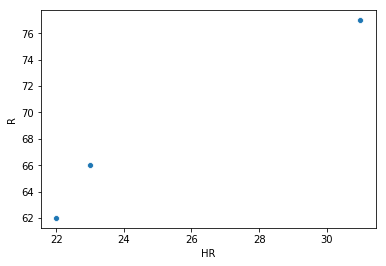

In [31]:
sns.scatterplot(x='HR', y='R',data=Max_2016_2018)

In [32]:
prior = beta(a=28.33, b=55.3)

In [33]:
xvals = np.linspace(0,1, 216 )

In [34]:
yvals = prior.pdf(xvals)

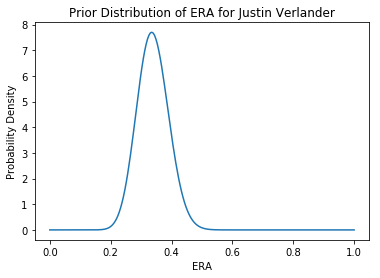

In [35]:
plt.plot(xvals, yvals)
plt.xlabel('ERA')
plt.ylabel('Probability Density')
plt.title('Prior Distribution of ERA for Justin Verlander');

In [36]:
predict_ERA(C=4.22, a=25, b=54,k=284, i=216.1)

3.2713651087459508

In [37]:
prior_Max = beta(a=25, b=54)

In [38]:
xvals_Max = np.linspace(0,1, 216)

In [39]:
yvals_Max = prior_Max.pdf(xvals_Max)

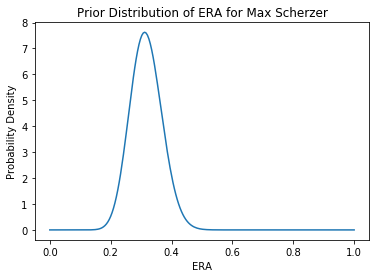

In [40]:
plt.plot(xvals_Max, yvals_Max)
plt.xlabel('ERA')
plt.ylabel('Probability Density')
plt.title('Prior Distribution of ERA for Max Scherzer');

In [41]:
predict_ERA(C= 4.22, a = 20, b = 55, k= 137, i= 160)

3.8324999999999996

In [42]:
prior_CC = beta(a=20, b=55)

In [43]:
xvals_CC = np.linspace(0,1, 216)

In [44]:
yvals_CC = prior_CC.pdf(xvals_CC)

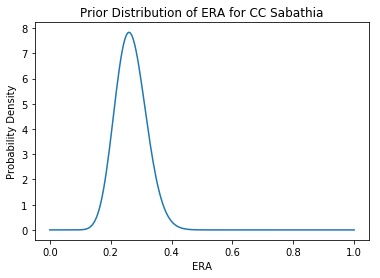

In [45]:
plt.plot(xvals_CC, yvals_CC)
plt.xlabel('ERA')
plt.ylabel('Probability Density')
plt.title('Prior Distribution of ERA for CC Sabathia');

In [46]:
data["FIP"].mean()

4.868811312417121

In [47]:
def get_map(row):    
    #ER
    alpha_prior = 30
    #IP
    beta_prior = 60
    alpha_posterior = row['ER'] + alpha_prior
    beta_posterior =  row["IP"] - row['ER'] + beta_prior
    return (9 * alpha_posterior - 1) / (alpha_posterior + beta_posterior -2)

In [48]:
ERA_2016_2018= data[features]

In [49]:
ERA_2016_2018.set_index('Name', inplace=True)

In [50]:
get_map(ERA_2016_2018.head(1))

Name
Jacob deGrom    2.091803
dtype: float64

In [51]:
ERA_2016_2018['MAP'] = ERA_2016_2018.apply(get_map, axis=1)

/Users/orah82/anaconda3/envs/DSI/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
ERA_2016_2018.sort_values('MAP', ascending=True).head()

,ER,IP,ERA,MAP
Name,,,,
Zack Britton,4.0,67.0,0.54,1.967742
Blake Treinen,7.0,80.1,0.78,1.975015
Jacob deGrom,41.0,217.0,1.70,2.091803
Clayton Kershaw,28.0,149.0,1.69,2.198312
Jeremy Jeffress,11.0,76.2,1.29,2.241169


In [53]:
ERA_2016_2018.loc[['Justin Verlander','CC Sabathia', 'Max Scherzer']]

,ER,IP,ERA,MAP
Name,,,,
Justin Verlander,60.0,214.0,2.52,2.678808
Justin Verlander,77.0,227.2,3.04,3.052030
Justin Verlander,77.0,206.0,3.36,3.272109
CC Sabathia,78.0,179.2,3.91,3.633982
CC Sabathia,62.0,153.0,3.65,3.431535
CC Sabathia,61.0,148.2,3.69,3.463167
Max Scherzer,62.0,220.2,2.53,2.683323
Max Scherzer,56.0,200.2,2.51,2.682165
Max Scherzer,75.0,228.1,2.96,2.986397
